In [46]:
import pandas as pd 
import glob as glob
import json
import os

def list_paths_to_dict(paths):
    """
    Converts a list of file paths into a nested dictionary structure,
    where end-nodes are the file names (strings), not empty dictionaries.
    """
    tree = {}
    for path in paths:
        node = tree
        parts = path.split(os.sep)
        
        # Iterate through all parts except the last one (the actual file name)
        for part in parts[:-1]:
            if part:
                # If 'part' isn't a key yet, set it to an empty dict
                if part not in node:
                    node[part] = {}
                # Move the 'node' reference deeper into the newly created dict
                node = node[part]
        
        # At the very end, for the last part (the file name), 
        # set its value to something meaningful, e.g., the file name string itself, or None
        file_name = parts[-1]
        if file_name:
            # You can store the filename string, a boolean 'True', or 'None'
            node[file_name] = None # Or 'file_name', or True 
            
    return tree

output directory: ../scaffolding_runs/MyCustomDataset_EPA/c/metrics/iteration_09/

- `meta_scores.csv` and `train_scores.csv` contain the per-example predictions, residuals, and metric outputs for the meta/dev
  and train splits.
- `metric_decisions.json` summarizes which candidate metrics were kept/eliminated in that iteration.
- `metrics.json` lists the accepted metric names, descriptions, and the file that implements each metric scorer script.
- The metric implementation modules themselves live under `metrics/` inside each iteration (e.g., `metrics/Actionability_and_Specificity_gpt_5_mini.py`), so you can open those to inspect the generated judge code.
- Earlier iterations (e.g., `iteration_00` … `iteration_08`) carry the same structure if you want to trace how the scaffolding loop evolved.

In [125]:
output_files_iter_9 = glob.glob(
    '../scaffolding_runs/MyCustomDataset_EPA/c/run_iterative_sans_explanations_sans_negative_metrics/metrics/iteration_09/*'
)

In [126]:
for i in output_files_iter_9:
    if '.' in i.split('/')[-1]:
        print()
        print('----------------------------------------------------')
        print()
        print(i)
        print()
        print('----------------------------------------------------')
        print()
        print(open(i).read()[:500])
        print()


----------------------------------------------------

../scaffolding_runs/MyCustomDataset_EPA/c/run_iterative_sans_explanations_sans_negative_metrics/metrics/iteration_09/metrics.json

----------------------------------------------------

{
  "phase": "metrics",
  "iteration": 9,
  "accepted": false,
  "metrics": [
    {
      "name": "Specific_Actionable_Requests_and_Escalation_Triggers_gpt-5-mini",
      "description": "**Specific, Actionable Requests and Escalation Triggers** Whether the submission contains clear asks that require leadership action (e.g., requests to extend deadlines, rescind guidance, initiate litigation, suspend rulemaking) and therefore should be escalated immediately.",
      "path": "scaffolding_runs/MyCu


----------------------------------------------------

../scaffolding_runs/MyCustomDataset_EPA/c/run_iterative_sans_explanations_sans_negative_metrics/metrics/iteration_09/metric_decisions.json

----------------------------------------------------

[
  {
   

In [127]:
import pyperclip
print(output_files_iter_9[2])
# pyperclip.copy(pd.DataFrame(json.load(open(output_files_iter_9[2]))).to_csv())
pd.DataFrame(json.load(open(output_files_iter_9[2])))

../scaffolding_runs/MyCustomDataset_EPA/c/run_iterative_sans_explanations_sans_negative_metrics/metrics/iteration_09/metric_decisions.json


,name,status,description
0,Specific_Actionable_Requests_and_Escalation_Tr...,kept,"**Specific, Actionable Requests and Escalation..."
1,Legal_and_Technical_Merit_gpt-5-mini,kept,**Legal and Technical Merit** Whether the draf...
2,Public_Health_Environmental_Justice_and_Urgenc...,kept,"**Public Health, Environmental Justice, and Ur..."
3,Regulatory_Text_Ambiguity_and_Scope_Risk_gpt-5...,eliminated,**Regulatory Text Ambiguity and Scope Risk** W...
4,Implementation_and_Compliance_Burden_Estimates...,kept,**Implementation and Compliance Burden Estimat...
5,Evidence_Traceability_and_Reproducibility_gpt-...,kept,**Evidence Traceability and Reproducibility** ...
6,Cross-Jurisdictional_and_Interagency_Consequen...,kept,**Cross-Jurisdictional and Interagency Consequ...
7,Attachment_Accessibility_and_Executive-Summary...,kept,**Attachment Accessibility and Executive-Summa...
8,Agency_Resource_Burden_and_Follow-up_Complexit...,kept,**Agency Resource Burden and Follow-up Complex...
9,Methodological_and_Analytical_Review_Complexit...,kept,**Methodological and Analytical Review Complex...


In [134]:
print(output_files_iter_9[0])
pd.DataFrame(
json.load(open(output_files_iter_9[0]))['metrics']
            )

../scaffolding_runs/MyCustomDataset_EPA/c/run_iterative_sans_explanations_sans_negative_metrics/metrics/iteration_09/metrics.json


,name,description,path
0,Specific_Actionable_Requests_and_Escalation_Tr...,"**Specific, Actionable Requests and Escalation...",scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
1,Legal_and_Technical_Merit_gpt-5-mini,**Legal and Technical Merit** Whether the draf...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
2,Public_Health_Environmental_Justice_and_Urgenc...,"**Public Health, Environmental Justice, and Ur...",scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
3,Implementation_and_Compliance_Burden_Estimates...,**Implementation and Compliance Burden Estimat...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
4,Evidence_Traceability_and_Reproducibility_gpt-...,**Evidence Traceability and Reproducibility** ...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
5,Cross-Jurisdictional_and_Interagency_Consequen...,**Cross-Jurisdictional and Interagency Consequ...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
6,Attachment_Accessibility_and_Executive-Summary...,**Attachment Accessibility and Executive-Summa...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
7,Agency_Resource_Burden_and_Follow-up_Complexit...,**Agency Resource Burden and Follow-up Complex...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
8,Methodological_and_Analytical_Review_Complexit...,**Methodological and Analytical Review Complex...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...
9,Evidence_Quality_and_Peer-Review_Status_gpt-5-...,**Evidence Quality and Peer-Review Status** Ev...,scaffolding_runs/MyCustomDataset_EPA/c/run_82c...


# Across all iterations

In [135]:
metrics_dir = '../scripts/autometrics/scaffolding_runs/MyCustomDataset_EPA/c/metrics'
metrics_dir = '../scaffolding_runs/MyCustomDataset_EPA/c/run_iterative_sans_explanations_sans_negative_metrics/metrics'
output_files = glob.glob(f'{metrics_dir}/*/*')
filepath_dicts = list_paths_to_dict(output_files)
for d in metrics_dir.split('/'):
    filepath_dicts = filepath_dicts[d]

In [138]:
t = json.load(open(os.path.join(metrics_dir, metric_iter, f)))

In [ ]:
for metric_iter in sorted(filepath_dicts, key=lambda x: int(x.split('_')[1])):
    filepaths = filepath_dicts[metric_iter]
    for f, _ in filepaths.items():
        if f.endswith('.json'):
            filepath_dicts[metric_iter][f] = pd.DataFrame(json.load(open(os.path.join(metrics_dir, metric_iter, f))))
        elif f.endswith('.csv'):
            filepath_dicts[metric_iter][f] = pd.read_csv(os.path.join(metrics_dir, metric_iter, f))

In [92]:
filepath_dicts['iteration_09']['metrics.json']

,phase,iteration,accepted,metrics,added_metrics
0,metrics,9,False,{'name': 'Legal_Risk_Challenge_to_Agency_Autho...,Novel_Technical_Evidence_gpt-5-mini
1,metrics,9,False,{'name': 'Targeted_Relevance_to_Docket_and_Dec...,Actionability_and_Specificity_gpt-5-mini
2,metrics,9,False,{'name': 'Institutional_Authority_and_Politica...,Operational_and_Implementation_Impact_gpt-5-mini
3,metrics,9,False,{'name': 'Actionability_and_Specificity_gpt-5-...,Systemic_or_Precedential_Implications_gpt-5-mini


In [95]:
metrics_files = glob.glob('../scripts/autometrics/scaffolding_runs/MyCustomDataset_EPA/c/metrics/*/metrics.json')

In [101]:
full_metric_files_df = pd.concat(list(map(pd.read_json, metrics_files))).sort_values('iteration').reset_index(drop=True)

In [ ]:
full_metric_files_df[['iteration', 'added_metrics']]

# Parse prompts

description of `metrics.json`

- `phase / iteration / accepted` – basic bookkeeping. Here accepted=False, so even though new metrics were proposed, the
  ensemble didn’t beat the prior meta score and the whole iteration was discarded.
- `metrics array` – snapshot of the regression support that was fit this round. Each entry lists the metric’s name/
  description and the on-disk .py path under scaffolding_runs/MyCustomDataset_EPA/c/run_82c0463a/metrics/iteration_09/
  metrics/…. Those files are the exact Python definitions scored during the iteration.
- `added_metrics` – just the names of the newly proposed metrics that were under consideration this round
  (they’ll also show up in the per-metric metadata). Even if some appear in the metrics list (e.g.,
  Litigation_Risk_and_Stakeholder_Threat_Level_gpt-5-mini), none of them become part of the persistent core set because
  accepted=False.

In [200]:
! ls -lh ../scaffolding_runs/MyCustomDataset_EPA/c/run_d818b212/metrics

total 0
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 14:34 iteration_00
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 14:43 iteration_01
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 14:52 iteration_02
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 15:00 iteration_03
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 15:09 iteration_04
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 15:21 iteration_05
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 15:28 iteration_06
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 15:37 iteration_07
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 15:45 iteration_08
drwxr-xr-x@ 8 spangher  staff   256B Dec 10 15:54 iteration_09


In [202]:
run = 'run_iterative_sans_explanations_sans_negative_metrics'
run = 'run_d818b212'
t = f'../scaffolding_runs/MyCustomDataset_EPA/c/{run}/metrics/iteration_09/metric_decisions.json'
t2= f'../scaffolding_runs/MyCustomDataset_EPA/c/{run}/metrics/iteration_09/metrics.json'

In [203]:
pd.read_json(t)

,name,status,description
0,Legal_and_Procedural_Risk_gpt-5-mini,kept,**Legal and Procedural Risk** Whether the draf...
1,Substantive_Evidence_and_Technical_Rigor_gpt-5...,kept,**Substantive Evidence and Technical Rigor** P...
2,Source_Authority_and_Representation_gpt-5-mini,kept,**Source Authority and Representation** The cr...
3,Urgency_and_Concrete_Ask_gpt-5-mini,kept,**Urgency and Concrete Ask** Whether the submi...
4,Scale_and_Reach_of_Impact_gpt-5-mini,kept,**Scale and Reach of Impact** Whether the comm...
5,Novelty_and_Record-Changing_Evidence_gpt-5-mini,kept,**Novelty and Record-Changing Evidence** Wheth...
6,Stakeholder_Coordination_and_Escalation_Signal...,kept,**Stakeholder Coordination and Escalation Sign...
7,Content_Accessibility_and_Completeness_gpt-5-mini,kept,**Content Accessibility and Completeness** Whe...
8,Operational_and_Resource_Impact_gpt-5-mini,kept,**Operational and Resource Impact** The extent...
9,Immediacy_and_Public-Safety_Flag_gpt-5-mini,kept,**Immediacy and Public-Safety Flag** Presence ...


In [204]:
t3= json.load(open(t2))

In [205]:
coreset_metrics_df = pd.DataFrame(t3['metrics'])

In [207]:
coreset_metrics_df

,name,description,path
0,Legal_and_Procedural_Risk_gpt-5-mini,**Legal and Procedural Risk** Whether the draf...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
1,Substantive_Evidence_and_Technical_Rigor_gpt-5...,**Substantive Evidence and Technical Rigor** P...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
2,Source_Authority_and_Representation_gpt-5-mini,**Source Authority and Representation** The cr...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
3,Urgency_and_Concrete_Ask_gpt-5-mini,**Urgency and Concrete Ask** Whether the submi...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
4,Scale_and_Reach_of_Impact_gpt-5-mini,**Scale and Reach of Impact** Whether the comm...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
5,Novelty_and_Record-Changing_Evidence_gpt-5-mini,**Novelty and Record-Changing Evidence** Wheth...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
6,Stakeholder_Coordination_and_Escalation_Signal...,**Stakeholder Coordination and Escalation Sign...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
7,Content_Accessibility_and_Completeness_gpt-5-mini,**Content Accessibility and Completeness** Whe...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
8,Operational_and_Resource_Impact_gpt-5-mini,**Operational and Resource Impact** The extent...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
9,Immediacy_and_Public-Safety_Flag_gpt-5-mini,**Immediacy and Public-Safety Flag** Presence ...,scaffolding_runs/MyCustomDataset_EPA/c/run_d81...


In [206]:
coreset_metrics_df['path']

0     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
1     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
2     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
3     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
4     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
5     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
6     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
7     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
8     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
9     scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
10    scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
11    scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
12    scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
13    scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
14    scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
15    scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
16    scaffolding_runs/MyCustomDataset_EPA/c/run_d81...
17    scaffolding_runs/MyCustomDataset_EPA/c/run

In [167]:
t3['added_metrics']

['Author_Affiliation_and_Representativeness_gpt-5-mini',
 'Novelty_and_Incremental_Evidence_Value_gpt-5-mini',
 'Litigation_Risk_and_Stakeholder_Threat_Level_gpt-5-mini',
 'Signal-to-Noise_Distinctive_Content_Density_gpt-5-mini']

In [186]:
import tiktoken
import pandas as pd 
df = pd.read_csv('full_matched_comment_df__epa.csv')

<Axes: >

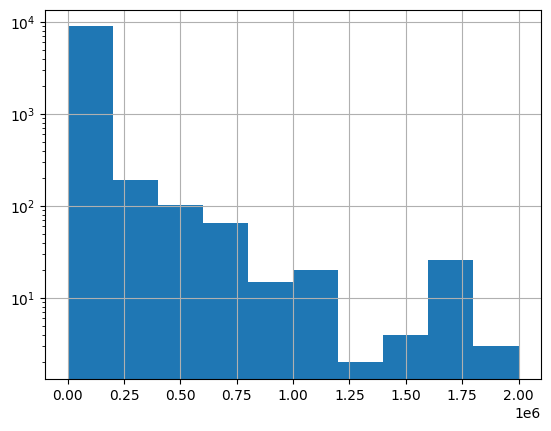

In [184]:
df['actual_comment'].str.len().hist(log=True, range=(0, 2_000_000))

In [187]:
ENCODING_NAME = "cl100k_base"  # e.g., for most OpenAI GPT-4/GPT-3.5 models
encoding = tiktoken.get_encoding(ENCODING_NAME)

def count_tokens(text: str) -> int:
    """Return token count for the given text."""
    return len(encoding.encode(text))

In [188]:
tok_counts = df['actual_comment'].apply(count_tokens)

In [190]:
tok_counts.max()

11648696

<Axes: >

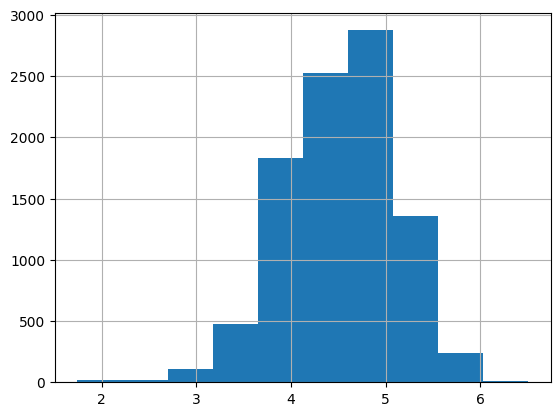

In [195]:
pd.concat([
    df['actual_comment'].str.len().to_frame('char_count'),
    tok_counts.to_frame('token_count')
], axis=1).apply(lambda x: x['char_count'] / x['token_count'], axis=1).hist()

## Deeper look at run `run_d818b212`
The following cells load scaffolding artifacts for the latest EPA run so we can inspect performance, residuals, metric turnover, and prompt lengths.

In [215]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors

RUN_ID = "run_d818b212"
TARGET_COL = "c"
RUN_ROOT = Path('..') / 'scaffolding_runs' / 'MyCustomDataset_EPA' / 'c' / RUN_ID
if not RUN_ROOT.exists():
    raise FileNotFoundError(f"Run directory {RUN_ROOT} not found")

iteration_records = []
metric_sets = []
prompt_records = []

for phase in ["metrics"]:#, "rubric"]:
    phase_dir = RUN_ROOT / phase
    if not phase_dir.exists():
        continue
    for iter_dir in sorted(phase_dir.glob('iteration_*')):
        iteration = int(iter_dir.name.split('_')[-1])
        meta_path = iter_dir / 'metrics.json'
        if not meta_path.exists():
            continue
        meta = json.loads(meta_path.read_text())
        metrics = [m['name'] for m in meta.get('metrics', [])]
        metric_sets.append({
            'phase': phase,
            'iteration': iteration,
            'metrics': metrics,
        })
        try:
            meta_scores = pd.read_csv(iter_dir / 'meta_scores.csv')
            perf = meta_scores['prediction'].corr(meta_scores[TARGET_COL])
        except Exception:
            perf = np.nan
        try:
            train_scores = pd.read_csv(iter_dir / 'train_scores.csv')
            mean_abs_resid = train_scores['residual'].abs().mean()
        except Exception:
            mean_abs_resid = np.nan
        iteration_records.append({
            'phase': phase,
            'iteration': iteration,
            'accepted': bool(meta.get('accepted', False)),
            'performance': perf,
            'mean_abs_residual': mean_abs_resid,
        })
        prompts_dir = iter_dir / 'prompts'
        if prompts_dir.exists():
            for prompt_file in prompts_dir.glob('*_prompt.json'):
                payload = json.loads(prompt_file.read_text())
                metric_name = payload.get('metric_name') or prompt_file.stem.replace('_prompt', '')
                context = payload.get('context') or payload
                prompt_text = json.dumps(context, ensure_ascii=False)
                prompt_records.append({
                    'phase': phase,
                    'iteration': iteration,
                    'metric_name': metric_name,
                    'prompt_chars': len(prompt_text),
                })

perf_df = pd.DataFrame(iteration_records)
metric_sets_df = pd.DataFrame(metric_sets)
prompt_df = pd.DataFrame(prompt_records)
print(f"Loaded {len(perf_df)} iteration summaries, {len(metric_sets_df)} metric snapshots, {len(prompt_df)} prompt payloads.")

Loaded 10 iteration summaries, 10 metric snapshots, 50 prompt payloads.


### Performance and residuals per iteration
Pearson correlation on the meta split serves as the iteration score. The average absolute residual is taken from the training snapshot for the same iteration.

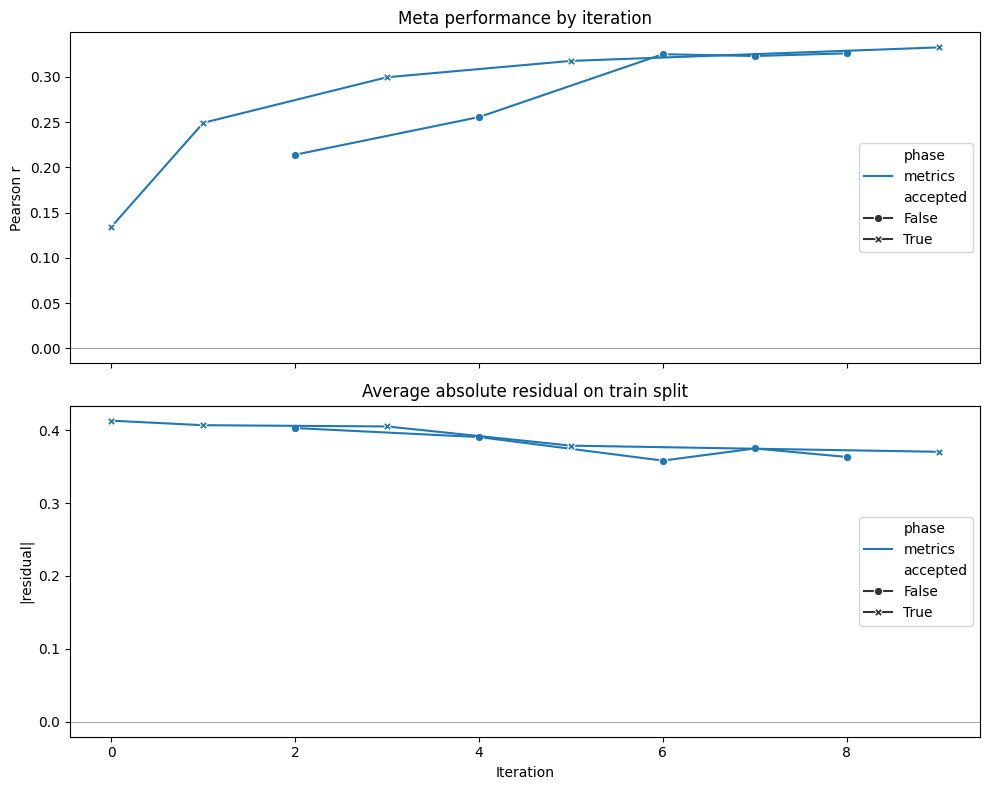

In [216]:
if perf_df.empty:
    raise RuntimeError('No iteration summaries were found')
perf_plot = perf_df.sort_values(['phase', 'iteration'])
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
sns.lineplot(
    data=perf_plot,
    x='iteration',
    y='performance',
    hue='phase',
    style='accepted',
    markers=True,
    dashes=False,
    ax=axes[0],
)
axes[0].set(title='Meta performance by iteration', ylabel='Pearson r')
axes[0].axhline(0, color='gray', linewidth=0.5)
sns.lineplot(
    data=perf_plot,
    x='iteration',
    y='mean_abs_residual',
    hue='phase',
    style='accepted',
    markers=True,
    dashes=False,
    ax=axes[1],
)
axes[1].set(title='Average absolute residual on train split', ylabel='|residual|')
axes[1].axhline(0, color='gray', linewidth=0.5)
axes[1].set_xlabel('Iteration')
plt.tight_layout()
plt.show()

### Metric turnover by iteration
Each cell indicates whether a metric was active in the sparse support for a given iteration of the metrics phase. Newly introduced metrics are shaded green, retained metrics light blue, and cells in red mark metrics that were dropped relative to the previous iteration.

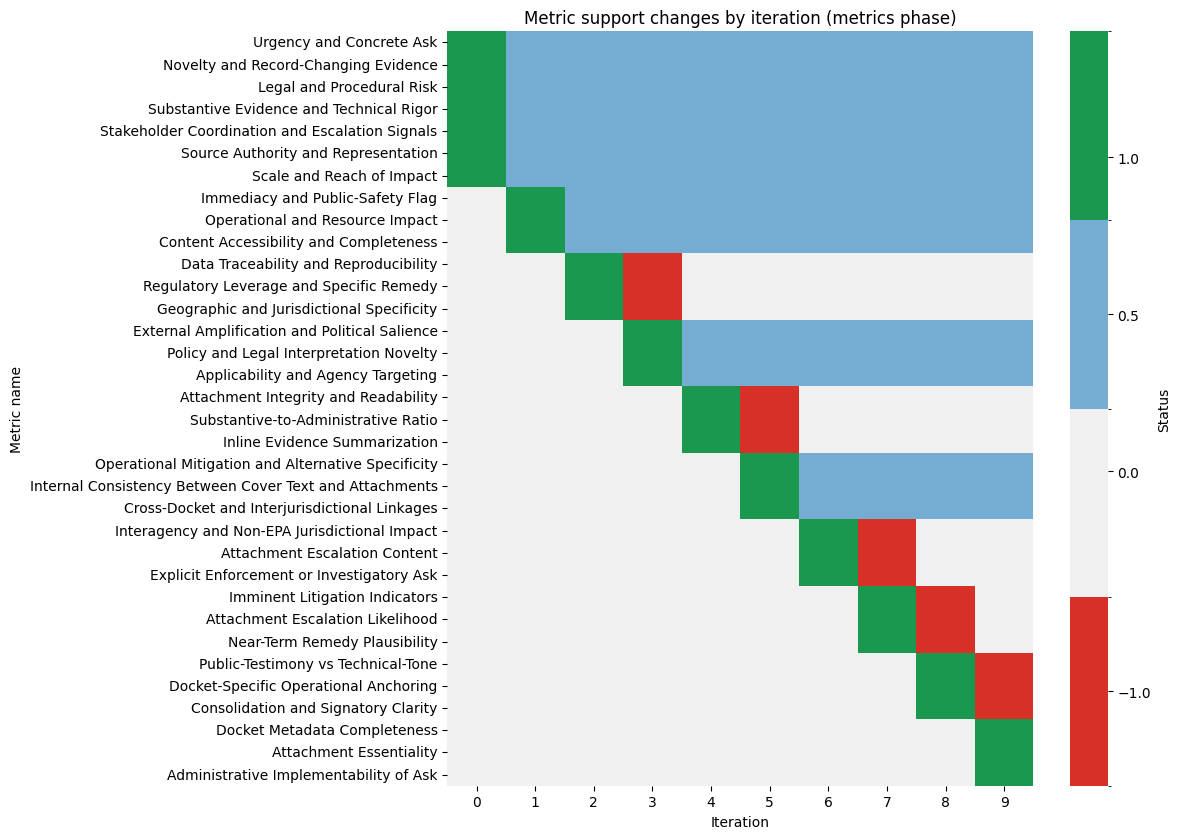

In [230]:
metric_phase = metric_sets_df[metric_sets_df['phase'] == 'metrics'].copy()
if metric_phase.empty:
    raise RuntimeError('No metric phase data found for visualization')
all_metrics = sorted({m for metrics in metric_phase['metrics'] for m in metrics})
iterations = sorted(metric_phase['iteration'].unique())
status = pd.DataFrame(0.0, index=all_metrics, columns=iterations)
prev = set()
for _, row in metric_phase.sort_values('iteration').iterrows():
    it = row['iteration']
    current = set(row['metrics'])
    entered = current - prev
    dropped = prev - current
    for name in current:
        status.loc[name, it] = 1.0 if name in entered else 0.5
    for name in dropped:
        status.loc[name, it] = -1.0
    prev = current

order = (status == 1).astype(int).idxmax(axis=1).sort_values().index
cmap = mcolors.ListedColormap(['#d73027', '#f0f0f0', '#74add1', '#1a9850'])
norm = mcolors.BoundaryNorm([-1.5, -0.5, 0.25, 0.75, 1.5], cmap.N)
fig, ax = plt.subplots(figsize=(12, max(6, 0.25 * len(all_metrics))))
sns.heatmap(
    status.loc[order].rename(index=lambda x: x.replace('_gpt-5-mini', '').replace('_', ' ')), 
    cmap=cmap, norm=norm, cbar_kws={'ticks': [-1, 0, 0.5, 1], 'label': 'Status'}, ax=ax
)
ax.set(title='Metric support changes by iteration (metrics phase)', xlabel='Iteration', ylabel='Metric name')
plt.tight_layout()
plt.show()

### Prompt lengths for newly proposed metrics
Prompt size is measured as the character length of the JSON payload captured when each metric was first proposed.

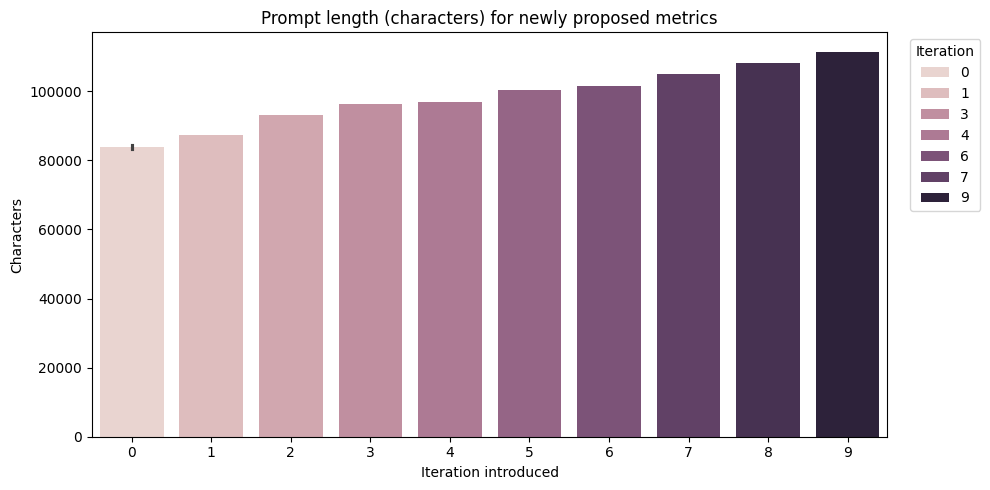

In [218]:
if prompt_df.empty:
    raise RuntimeError('No prompt payloads were captured for this run')
prompt_metrics = (prompt_df[prompt_df['phase'] == 'metrics']
                  .sort_values('iteration')
                  .drop_duplicates('metric_name', keep='first'))
if prompt_metrics.empty:
    raise RuntimeError('No metric-phase prompt payloads were found')
plt.figure(figsize=(10, 5))
sns.barplot(data=prompt_metrics, x='iteration', y='prompt_chars', hue='iteration', dodge=False)
plt.title('Prompt length (characters) for newly proposed metrics')
plt.ylabel('Characters')
plt.xlabel('Iteration introduced')
plt.legend(title='Iteration', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Example selector

In [258]:

from pathlib import Path
import pandas as pd
import textwrap

RUN_ROOT = Path('../scaffolding_runs/MyCustomDataset_EPA/c')
RUN_HINT = '2025-12-10__full-run-with-4k-truncation'  # substring or exact name to filter runs
ITERATION_INDEX = None  # set to an int (e.g., 9) to pin a specific iteration
TARGET_COLUMN = 'c'
ROUND_METRICS_TO = 3
TOP_PAIR_COUNT = 6
DATASET_PATH = Path('full_matched_comment_df__epa.csv')


def _shorten(text: str, width: int = 280) -> str:
    if not isinstance(text, str):
        return ''
    cleaned = ' '.join(text.split())
    if len(cleaned) <= width:
        return cleaned
    return textwrap.shorten(cleaned, width=width, placeholder=' …')


def _load_dataset(path: Path):
    if not path.exists():
        print(f'Warning: dataset file {path} is missing; text columns will be empty.')
        return None
    df = pd.read_csv(path)
    if df.columns[0].startswith('Unnamed'):
        df = df.rename(columns={df.columns[0]: '_row_id'})
    if 'index' not in df.columns:
        return df
    df = df.set_index('index')
    if df.index.has_duplicates:
        df = df.groupby(level=0).first()
    return df


def _pick_run(root: Path, hint: str | None):
    candidates = sorted([p for p in root.iterdir() if p.is_dir()], key=lambda p: p.stat().st_mtime)
    if not candidates:
        raise FileNotFoundError(f'No scaffolding runs found under {root}')
    if hint:
        hinted = [p for p in candidates if hint in p.name]
        if hinted:
            return hinted[-1]
        print(f'Hint "{hint}" not found; falling back to the latest run.')
    return candidates[-1]


def _pick_iteration(run_path: Path, iteration_index: int | None):
    metric_root = run_path / 'metrics'
    if iteration_index is not None:
        target = metric_root / f'iteration_{iteration_index:02d}'
        if not target.exists():
            raise FileNotFoundError(f'Iteration {iteration_index} not found under {metric_root}')
        return target
    iterations = sorted(metric_root.glob('iteration_*'))
    if not iterations:
        raise FileNotFoundError(f'No iterations found under {metric_root}')
    return iterations[-1]


runs = _pick_run(RUN_ROOT, RUN_HINT)
iteration_dir = _pick_iteration(runs, ITERATION_INDEX)
print(f'Using run: {runs.name} | iteration: {iteration_dir.name}')

train_scores_path = iteration_dir / 'train_scores.csv'
train_df = pd.read_csv(train_scores_path)

non_metric_cols = {'index', TARGET_COLUMN, 'prediction', 'residual'}
metric_cols = [c for c in train_df.columns if c not in non_metric_cols]
if not metric_cols:
    raise ValueError('No metric columns found in the train scores file.')

rounded = train_df[metric_cols].round(ROUND_METRICS_TO).astype(str)
train_df['_metric_signature'] = rounded.agg('|'.join, axis=1)

lookup_df = _load_dataset(DATASET_PATH)


def _fetch_text(doc_id: str, column: str = 'comment_in_response') -> str:
    if lookup_df is None or doc_id not in lookup_df.index:
        return ''
    row = lookup_df.loc[doc_id]
    if isinstance(row, pd.DataFrame):
        row = row.iloc[0]
    return row.get(column, '')


pairs: list[dict] = []
max_pairs = TOP_PAIR_COUNT
for signature, group in train_df.groupby('_metric_signature'):
    if group[TARGET_COLUMN].nunique() < 2:
        continue
    group = group.sort_values('prediction')
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            row_i = group.iloc[i]
            row_j = group.iloc[j]
            if row_i[TARGET_COLUMN] == row_j[TARGET_COLUMN]:
                continue
            pairs.append(
                {
                    'doc_id_a': row_i['index'],
                    'label_a': row_i[TARGET_COLUMN],
                    'prediction_a': row_i['prediction'],
                    'doc_id_b': row_j['index'],
                    'label_b': row_j[TARGET_COLUMN],
                    'prediction_b': row_j['prediction'],
                    'prediction_gap': abs(row_i['prediction'] - row_j['prediction']),
                    'signature_sample': signature[:120] + ('…' if len(signature) > 120 else ''),
                    'comment_a': _fetch_text(row_i['index']),
                    'comment_b': _fetch_text(row_j['index']),
                }
            )
            if len(pairs) >= max_pairs:
                break
        if len(pairs) >= max_pairs:
            break
    if len(pairs) >= max_pairs:
        break

    pair_df = pd.DataFrame(pairs).sort_values('prediction_gap')

Using run: 2025-12-10__full-run-with-4k-truncation | iteration: iteration_04


In [246]:
pair_df = pd.DataFrame(pairs).sort_values('prediction_gap')

In [251]:
list(map(lambda x: x.replace('gpt-5-mini', '').replace('_', ' '), metric_cols))

['Policy or Regulatory Significance ',
 'Novelty and Severity of Concern ',
 'Credibility and Authority of Submitter ',
 'Actionability and Specific Requests ',
 'Geographic and Sectoral Breadth of Impact ',
 'Identifies Agency or International Inconsistency ',
 'External-Trigger and Imminent-Escalation Signals ']

In [253]:
pair_df[['signature_sample', 'comment_a', 'comment_b']].iloc[].to_dict()

{'signature_sample': '4.0|1.0|5.0|3.0|5.0|1.0|1.0',
 'comment_a': 'With regard to the primary standards, the CASAC recommended retaining the current 24-hour PM2.5 and PM10 standards but did not reach consensus on the adequacy of the current annual PM2.5 standard. With regard to the secondary standards, the CASAC recommended retaining the …',
 'comment_b': 'Several commenters, including Bayer Crop Science (EPA-HQ-OPP-2008-0331-0170), the National Association of Landscape Professionals (NALP) (EPA-HQ-OPP-2008-0331-0163), the Pyrethroid Working Group (PWG) (EPA-HQ-OPP-2008-0331-0162), the National Pest Management Association (NPMA) …'}